# ARotor (old & replication) results (mixed and non-mixed)


In [2]:
import os
import joblib

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


## Mixed installations


In [52]:
data_folder = os.path.join(os.path.abspath(""), os.pardir, os.pardir, "reports", "RAW", "result_generation")

all_results = []
for i in range(48):
    with open(os.path.join(data_folder, "arotor_replication_mixed", f"results_for_config_{i}.pkl"), "rb") as f:
        all_results.append(joblib.load(f))

all_results[0]


{'accuracies': [0.28444444444444444,
  0.4600740740740741,
  0.3668148148148148,
  0.41655555555555557,
  0.3027037037037037,
  0.3373333333333333,
  0.43118518518518517,
  0.3535185185185185,
  0.3916296296296296,
  0.4560740740740741],
 'cfs': [array([[4441,   54,  105,  590,  210],
         [ 156, 1451,  888, 1096, 1809],
         [ 348, 1674,    6, 2522,  850],
         [ 306,  677, 1141, 1754, 1522],
         [ 687, 2224,  578, 1883,   28]]),
  array([[5217,   23,  130,    9,   21],
         [ 160, 4791,  336,   73,   40],
         [ 235, 1779,  102, 1826, 1458],
         [   0,  355, 1418, 1267, 2360],
         [  60,  123, 2112, 2060, 1045]]),
  array([[4894,  235,  167,   90,   14],
         [2003,  140, 2407,  564,  286],
         [ 433, 1648, 1192,  444, 1683],
         [ 208,  225,  914,  597, 3456],
         [  30,  324,  225, 1740, 3081]]),
  array([[5162,   50,  102,   67,   19],
         [ 672, 2316,  942,  239, 1231],
         [ 277, 1691,  341, 1540, 1551],
         [ 

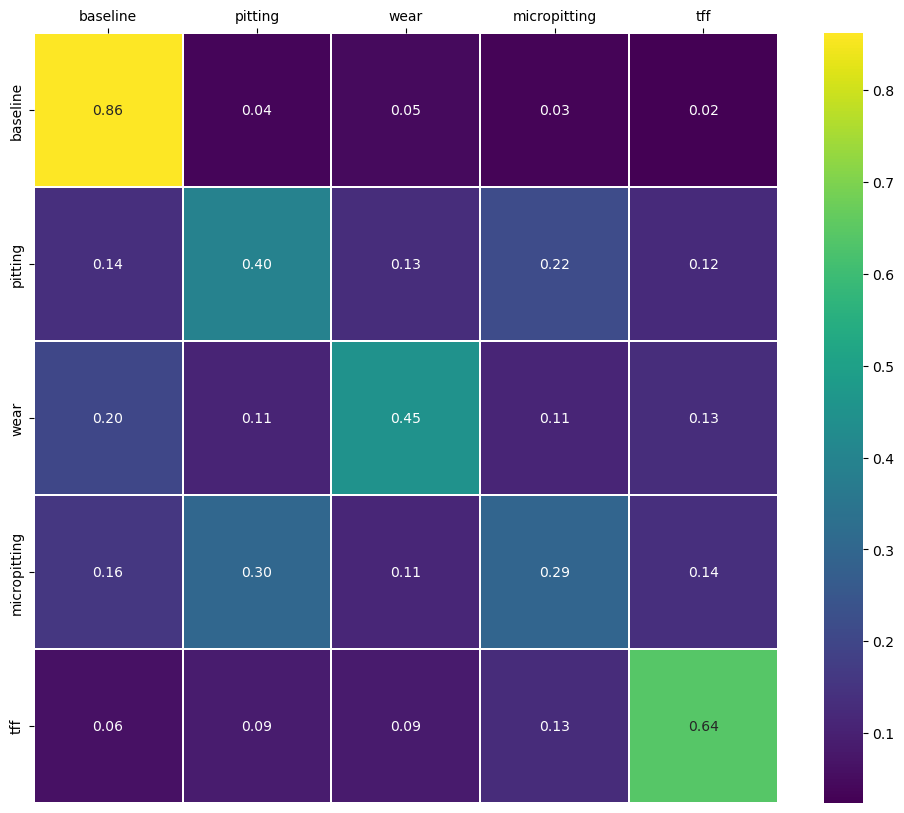

In [53]:
categories = ["baseline", "pitting", "wear", "micropitting", "tff"]

all_cfs = []
for i in range(48):
    cfs = np.array(all_results[i]["cfs"])
    all_cfs.append(cfs.mean(axis=0) / (cfs[0].sum() / 5))

cf_agg = np.array(all_cfs).mean(axis=0)

f, ax = plt.subplots(figsize=(12, 10))

g = sns.heatmap(
    cf_agg, annot=True, fmt=".2f", linewidth=0.3, xticklabels=categories, yticklabels=categories, cmap="viridis"
)

ax.xaxis.set_ticks_position("top")
ax.xaxis.set_label_position("top")


## Non-mixed


In [50]:
data_folder = os.path.join(os.path.abspath(""), os.pardir, os.pardir, "reports", "RAW", "result_generation")

all_results = []
for i in range(48):
    with open(os.path.join(data_folder, "arotor_replication", f"results_for_config_{i}.pkl"), "rb") as f:
        all_results.append(joblib.load(f))

all_results[0]


{'accuracies': [0.8571111111111112,
  0.543037037037037,
  0.8108518518518518,
  0.6334074074074074,
  0.5955555555555555,
  0.6573333333333333,
  0.7020740740740741,
  0.6049629629629629,
  0.8218148148148148,
  0.8723333333333333],
 'cfs': [array([[4918,   20,  124,  263,   75],
         [   5, 4641,   79,  673,    2],
         [  72,   74, 3954,  796,  504],
         [  62,  207,  317, 4792,   22],
         [ 184,    5,  361,   13, 4837]]),
  array([[3547,  653,  479,  299,  422],
         [ 533, 2992,  295,  558, 1022],
         [ 524,  614, 2555,  935,  772],
         [ 298,  739,  545, 2488, 1330],
         [ 224,  658,  458,  980, 3080]]),
  array([[4967,   27,   80,  195,  131],
         [  99, 4500,   77,   91,  633],
         [ 140,  338, 3991,  901,   30],
         [ 237,   73,  515, 4216,  359],
         [ 129,  587,   12,  453, 4219]]),
  array([[4763,  166,  295,   68,  108],
         [ 157, 3154,  569,  536,  984],
         [ 204,  855, 2774, 1329,  238],
         [  72,

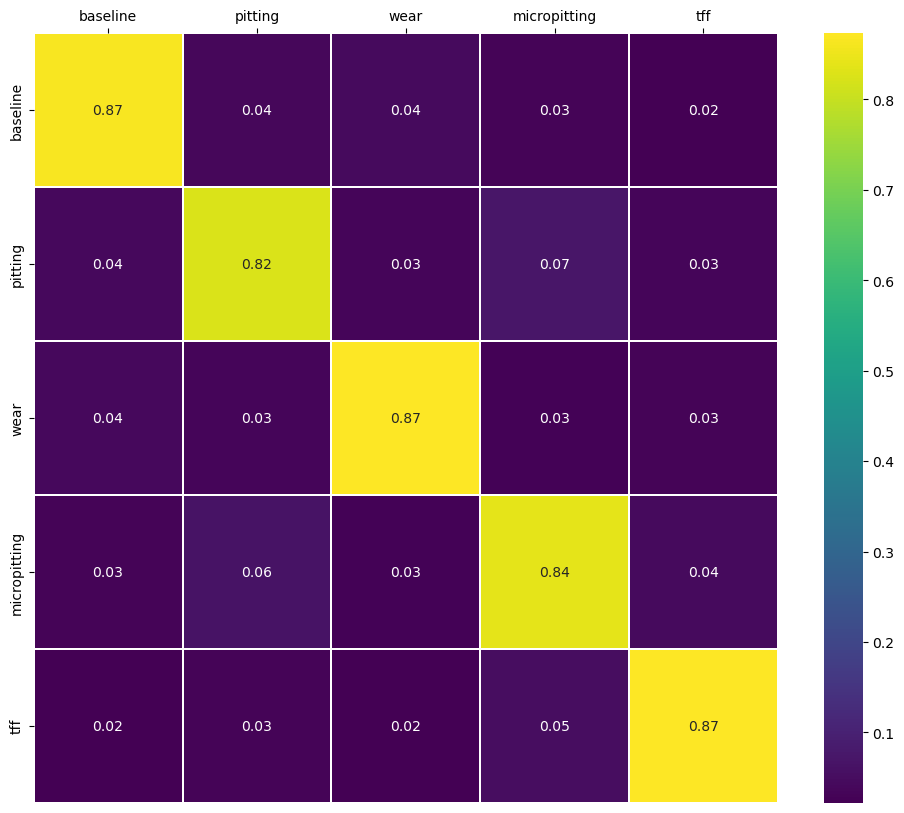

In [51]:
categories = ["baseline", "pitting", "wear", "micropitting", "tff"]

all_cfs = []
for i in range(48):
    cfs = np.array(all_results[i]["cfs"])
    all_cfs.append(cfs.mean(axis=0) / (cfs[0].sum() / 5))

cf_agg = np.array(all_cfs).mean(axis=0)

f, ax = plt.subplots(figsize=(12, 10))

g = sns.heatmap(
    cf_agg, annot=True, fmt=".2f", linewidth=0.3, xticklabels=categories, yticklabels=categories, cmap="viridis"
)

ax.xaxis.set_ticks_position("top")
ax.xaxis.set_label_position("top")


# ARotor


In [45]:
data_folder = os.path.join(os.path.abspath(""), os.pardir, os.pardir, "reports", "RAW", "result_generation")

all_results = []
for i in range(6):
    with open(os.path.join(data_folder, "arotor", f"results_for_config_{i}.pkl"), "rb") as f:
        all_results.append(joblib.load(f))

all_results[0]


{'accuracies': [0.7456666666666667,
  0.7533703703703704,
  0.7723703703703704,
  0.9168518518518518,
  0.8127592592592593,
  0.7976111111111112,
  0.8174444444444444,
  0.7884814814814814,
  0.8741481481481481,
  0.8564259259259259],
 'cfs': [array([[5261,    0,    0,    0,    0,  139,    0,    0,    0,    0],
         [   0, 3661, 1739,    0,    0,    0,    0,    0,    0,    0],
         [   0, 2762, 2638,    0,    0,    0,    0,    0,    0,    0],
         [   0,   28,   52, 5265,    4,    0,    0,    0,   51,    0],
         [   5,   54,  219,    0, 3506,  701,    0,  450,  465,    0],
         [ 296,   13,   65,    0, 1190, 3250,    0,  545,   41,    0],
         [   0,    0,    0,    0,    0,    1, 5041,   21,  268,   69],
         [   1,    0,    0,    0,  750,  457,  206, 3025,  961,    0],
         [   0,    0,    0,    1,  521,  196,   12, 1450, 3220,    0],
         [   0,    0,    0,    0,    0,    0,    1,    0,    0, 5399]]),
  array([[4417,    0,    0,    0,  552,  430, 

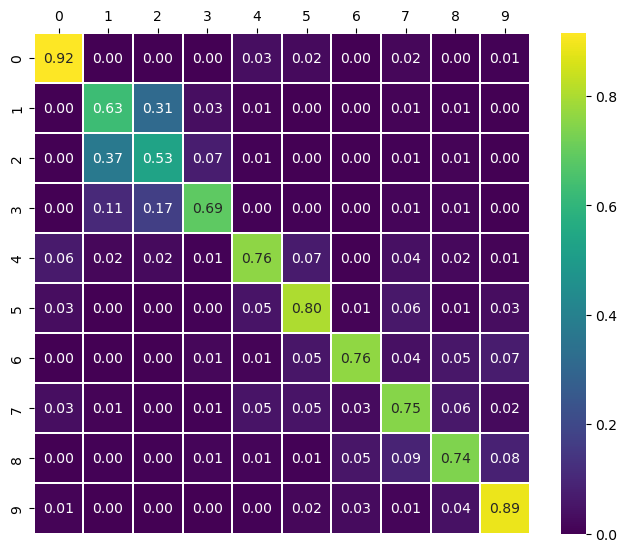

In [48]:
categories = list(range(10))

all_cfs = []
for i in range(6):
    cfs = np.array(all_results[i]["cfs"])
    all_cfs.append(cfs.mean(axis=0) / (cfs[0].sum() / 10))

cf_agg = np.array(all_cfs).mean(axis=0)

f, ax = plt.subplots(figsize=(8, 6.5))

g = sns.heatmap(
    cf_agg, annot=True, fmt=".2f", linewidth=0.3, xticklabels=categories, yticklabels=categories, cmap="viridis"
)

ax.xaxis.set_ticks_position("top")
ax.xaxis.set_label_position("top")
